<a href="https://colab.research.google.com/github/sombr3ro/Machine-Learning-Repo/blob/main/Regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
from torch import nn

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
#Generating dataset 
x1 = np.random.uniform(-3,3,1000)
x2 = np.random.uniform(-3,3,1000)
x = np.hstack((x1.reshape((len(x1),1)), x2.reshape((len(x2),1))))

y = []
for (i,j) in x:
  val = np.cos(2*i) + np.cos(3*j)
  y.append(val)
y = np.array(y)
y = np.reshape(y,(len(y),1))

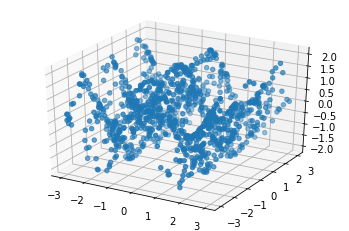

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x[:,0],x[:,1],y, zdir='z')

In [ ]:
x = torch.from_numpy(x)
x = x.to(device)
x = x.to(torch.float)
y = torch.from_numpy(y)
y = y.to(device)
y = y.to(torch.float)

In [ ]:
model = nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128,1)
)
model = model.to(device)
print(model)

loss_fn = nn.MSELoss()

learning_rate = 1e-2
optim = torch.optim.Adam(model.parameters(), lr = learning_rate)

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
)


In [ ]:
for layer in model.children():
  if hasattr(layer, 'reset_parameters'):
    layer.reset_parameters()

In [ ]:
epoch = 1000
loss_arr = []
for i in range(0,epoch):
  pred = model(x)
  loss = loss_fn(pred, y)
  loss_arr.append(loss.item())
  if ((i+1)%100==0):
    print("{}th epoch: loss: {}".format(i+1,loss.item()))
  
  optim.zero_grad()
  loss.backward()
  optim.step()

100th epoch: loss: 0.40619149804115295
200th epoch: loss: 0.26821619272232056
300th epoch: loss: 0.04643341153860092
400th epoch: loss: 0.008153842762112617
500th epoch: loss: 0.004850621335208416
600th epoch: loss: 0.005969848483800888
700th epoch: loss: 0.002338871592655778
800th epoch: loss: 0.0019475071458145976
900th epoch: loss: 0.002771003870293498
1000th epoch: loss: 0.0015952904941514134


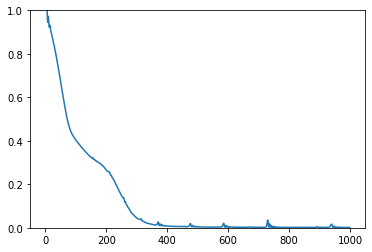

In [ ]:
fig=plt.figure()
plt.ylim(ymin=0)
plt.plot(loss_arr)

In [ ]:
#Test
x_train = np.random.uniform(-6,6,100)
X = []
for i in x_train:
  for j in x_train:
    X.append([i,j])
X = np.array(X)

x_t = torch.from_numpy(X)
x_t = x_t.to(device)
x_t = x_t.to(torch.float)

model.eval()
pred = 0.0
with torch.no_grad():
  pred = model(x_t)

y_p = np.array(pred.cpu()).squeeze()

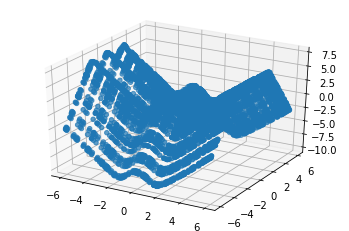

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], y_p, zdir='z')